# Anomaly detection via *Rolling MAD-score*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from darts.datasets import AirPassengersDataset
from darts.dataprocessing.transformers import WindowTransformer

W = 12

series = AirPassengersDataset().load()

transformer_med = WindowTransformer(transforms={"function": "median", "mode": "rolling", "window": W})

series_wndw_median = transformer_med.transform(series)

values = series.values().squeeze()
times = series.time_index

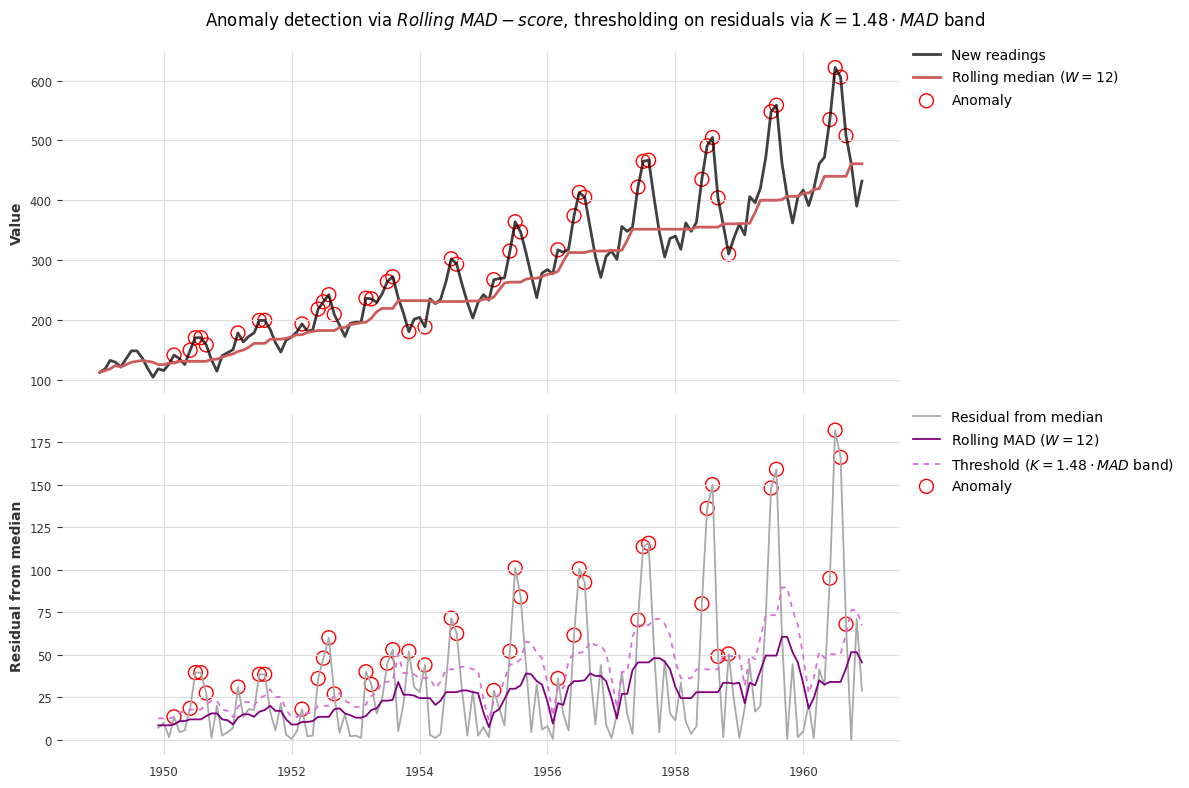

In [4]:
# calc

K = 1.48

MAD_scores = np.full(len(values), np.nan)
residuals = np.full(len(values), np.nan)

def window_fn(wnd, t):
	med = np.median(wnd)
	ress = np.abs(wnd - med)
	med_res = np.median(ress)

	MAD_scores[t] = med_res
	residuals[t] = np.abs(values[t] - med)

	return int(residuals[t] > K * MAD_scores[t])

from utils import apply_window_func

y_hat = apply_window_func(series, W, func=window_fn).values().squeeze()
idx_anomalies = np.argwhere(y_hat > 0).squeeze()

# visualize 

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
plt.suptitle(f"Anomaly detection via $Rolling \ MAD-score$, thresholding on residuals via $K={K} \cdot MAD$ band")

ax = ax0
series.plot(label="New readings", color="black", alpha=.75, ax=ax)
series_wndw_median.plot(label=f"Rolling median ($W={W}$)", color="indianred", ax=ax)
ax.scatter(series.time_index[idx_anomalies], series.values()[idx_anomalies], color="none", edgecolor="red", s=100, label="Anomaly")

ax.set_xlabel(None)
ax.set_ylabel("Value")
ax.legend(bbox_to_anchor=(1, 1.05))

ax = ax1
ax.plot(series.time_index, residuals, label=f"Residual from median", color="darkgrey")
ax.plot(series.time_index, MAD_scores, label=f"Rolling MAD ($W={W}$)", color="purple")
ax.plot(series.time_index, K * MAD_scores, linestyle=(0, (3, 3)), color="orchid", label=f"Threshold ($K={K} \cdot MAD$ band)")
ax.scatter(series.time_index[idx_anomalies], residuals[idx_anomalies], color="none", edgecolor="red", s=100, label="Anomaly")

ax.set_ylabel("Residual from median")
ax.legend(bbox_to_anchor=(1, 1.05))

plt.tight_layout()
plt.show()

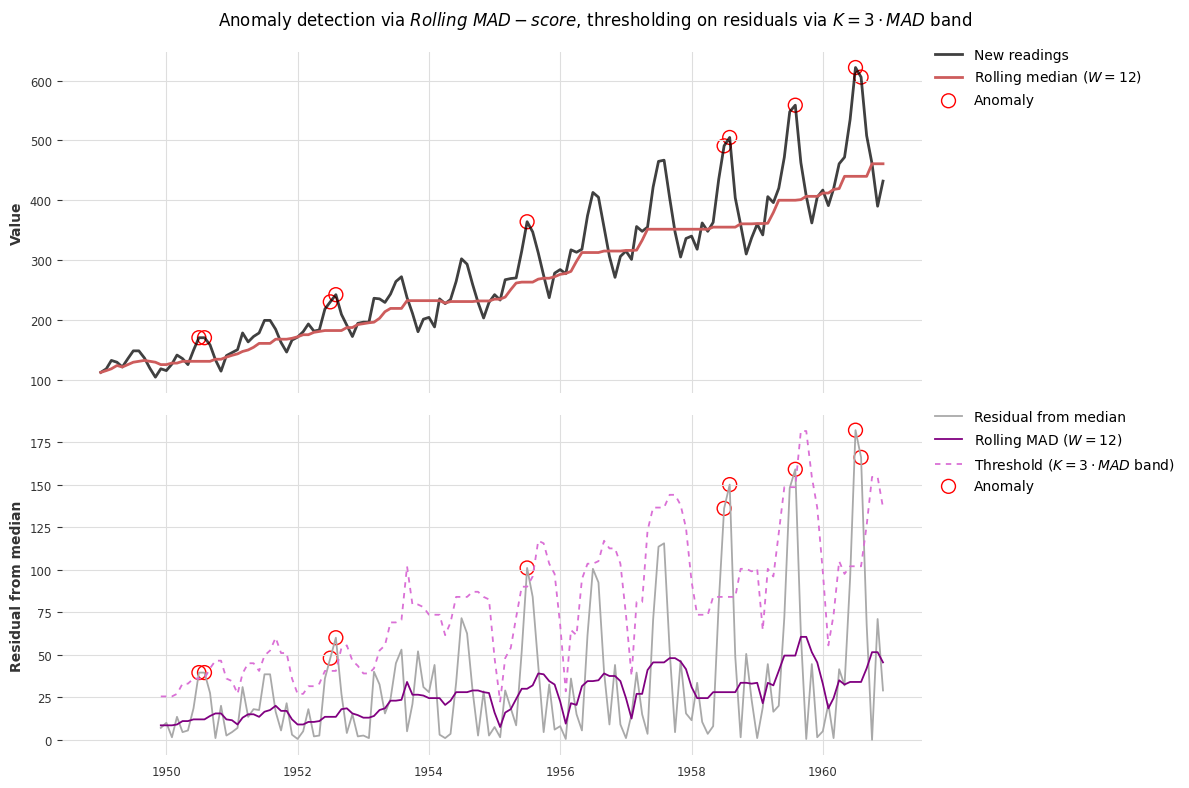

In [ ]:
# calc

K = 3

MAD_scores = np.full(len(values), np.nan)
residuals = np.full(len(values), np.nan)

def window_fn(wnd, t):
	med = np.median(wnd)
	ress = np.abs(wnd - med)
	med_res = np.median(ress)

	MAD_scores[t] = med_res
	residuals[t] = np.abs(values[t] - med)

	return int(residuals[t] > K * MAD_scores[t])

y_hat = apply_window_func(series, W, func=window_fn).values().squeeze()
idx_anomalies = np.argwhere(y_hat > 0).squeeze()

# visualize 

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
plt.suptitle(f"Anomaly detection via $Rolling \ MAD-score$, thresholding on residuals via $K={K} \cdot MAD$ band")

ax = ax0
series.plot(label="New readings", color="black", alpha=.75, ax=ax)
series_wndw_median.plot(label=f"Rolling median ($W={W}$)", color="indianred", ax=ax)
ax.scatter(series.time_index[idx_anomalies], series.values()[idx_anomalies], color="none", edgecolor="red", s=100, label="Anomaly")

ax.set_xlabel(None)
ax.set_ylabel("Value")
ax.legend(bbox_to_anchor=(1, 1.05))

ax = ax1
ax.plot(series.time_index, residuals, label=f"Residual from median", color="darkgrey")
ax.plot(series.time_index, MAD_scores, label=f"Rolling MAD ($W={W}$)", color="purple")
ax.plot(series.time_index, K * MAD_scores, linestyle=(0, (3, 3)), color="orchid", label=f"Threshold ($K={K} \cdot MAD$ band)")
ax.scatter(series.time_index[idx_anomalies], residuals[idx_anomalies], color="none", edgecolor="red", s=100, label="Anomaly")

ax.set_ylabel("Residual from median")
ax.legend(bbox_to_anchor=(1, 1.05))

plt.tight_layout()
plt.show()